# Spotify -- what can we learn looking at the top songs released?

### **Project Subject:** Using various sources to look at the Spotify charts and top music charts, we will analyze the different relationships and aspects of a song that may correlate to it rising to the top charts. 

We will be using three different data sources to analyze this idea:

### **Data Sources**

#### API: [APIList](https://apilist.fun/api/spotify-web)

This API looks up metadata about artists, tracks, and albums

#### Flat file: [Kaggle](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023)

“This dataset contains a comprehensive list of the most famous songs of 2023 as listed on Spotify. The dataset offers a wealth of features beyond what is typically available in similar datasets. It provides insights into each song's attributes, popularity, and presence on various music platforms. The dataset includes information such as track name, artist(s) name, release date, Spotify playlists and charts, streaming statistics, Apple Music presence, Deezer presence, Shazam charts, and various audio feature” 

#### Website (Table): [Wikipedia](https://en.wikipedia.org/wiki/List_of_Billboard_Hot_100_chart_achievements_and_milestones)

This wikipedia link contains several different tables that may be of use in this study, such as Top 10 songs of all time (1958–2021), Top 10 artists of all time (1958–2021), Most weeks at number one, Most weeks at number two (without hitting number one), and much more.


These three data sources each contain information about Spotify, specifically about the artists and songs that do the best. When looking at them altogether, we can form relationships between the different datasets according to what information they can provide about the top songs released. 


## Project Milestone 2 - Data clean up (Flat file)

In [1]:
# import the necessary packages
import pandas as pd

# load the csv file and display
df = pd.read_csv('spotify-2023.csv', encoding='latin-1')
print(df.shape)
df.head()

(953, 24)


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [2]:
# what columns do we have
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

### First transformation - Remove unnecessary columns

We will maintain the in_spotify_playlists column if it is needed, but as we are not comparing the different music streaming platforms, we can remove the Apple, Deezer, and Shazam charts and playlist columns.

In [3]:
# let's remove some unnecessary columns, specifically all the charts columns
df.drop(['in_spotify_charts', 'in_apple_playlists', 
         'in_apple_charts', 'in_deezer_playlists', 
         'in_deezer_charts', 'in_shazam_charts'], axis=1, inplace=True)

### Second transformation: to format the data to be more readable, let's transform the streams column to be in a more readable format -- from 9 digit numbers to ~ 4 digit numbers

In [4]:
# first, let's ensure 'streams' has only integers
# if a row contains a non-integer value, make it NaN to be removed later
# no need for data if it doesn't contain the stream count
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# now remove any rows containing NaN under streams
df.dropna(subset=['streams'], inplace=True)
print('Shape after removal: {}'.format(df.shape))

# now to transform the column. Since most numbers are in the 100,000,000's,
# we will transform the column to drop off the last 6 digits
df['streams'] = df['streams'].apply(lambda x : x/10000)
df.head()

Shape after removal: (952, 18)


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,14138.1703,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,13371.6286,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,14000.3974,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,80084.0817,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,30323.6322,144,A,Minor,65,23,80,14,63,11,6


### Third transformation: Renaming the header
As we have changed the column values, let it reflect in the header so we know the values are actually much higher than listed

In [5]:
# renaming the streams column to indicate the change in value
df.rename(columns={'streams':'streams(x10000)'}, inplace=True)

# check for any NA values
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
streams(x10000)          0
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

having NA values under key is okay.

### Fourth transformation: Checking For Outliers
Let's begin with the streams column again

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa6a0be1ab0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa6a0be1ff0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa6a0be1810>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa6a0be2530>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa6a0be27d0>],
 'means': []}

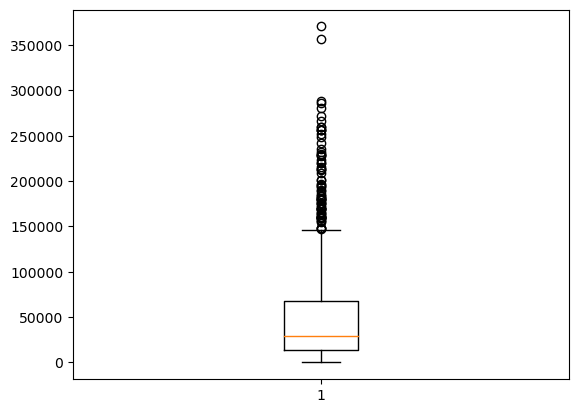

In [6]:
import matplotlib.pyplot as plt
plt.boxplot(df['streams(x10000)'])

This boxplot shows an interesting result. Since most of the values up to 30000 are pretty close together, we will not count them as outliers. To get a better idea as to what we're looking at, I will pull up the songs that are 25000 and greater and see if the results line up.

In [7]:
df[df['streams(x10000)'] > 25000]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,streams(x10000),bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,80084.0817,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,30323.6322,144,A,Minor,65,23,80,14,63,11,6
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,72598.0112,148,F,Minor,67,83,76,48,0,8,3
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,55363.4067,170,D,Minor,81,56,48,21,0,8,33
10,un x100to,"Bad Bunny, Grupo Frontera",2,2023,4,17,2876,50567.1438,83,F#,Minor,57,56,72,23,0,27,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,The Scientist,Coldplay,1,2002,8,5,30992,160816.4312,146,F,Major,56,21,44,73,0,11,2
911,Sparks,Coldplay,1,2000,7,10,10826,62410.1957,103,C#,Major,37,17,27,75,5,10,3
914,Selfish,PnB Rock,1,2016,6,23,2468,38031.9238,102,C#,Minor,64,4,60,11,0,19,4
923,we fell in love in october,girl in red,1,2018,11,21,6858,72304.3854,130,G,Major,57,24,37,11,18,16,3


Checking with another online database, the results seem to line up, thus we will not be deeming any of these results as outliers. Now let's check the bpm and in_spotify_playlists columns for outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa6a0cfdea0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa6a0cfe3e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa6a0cfdd20>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa6a0cfe920>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa6a0cfebc0>],
 'means': []}

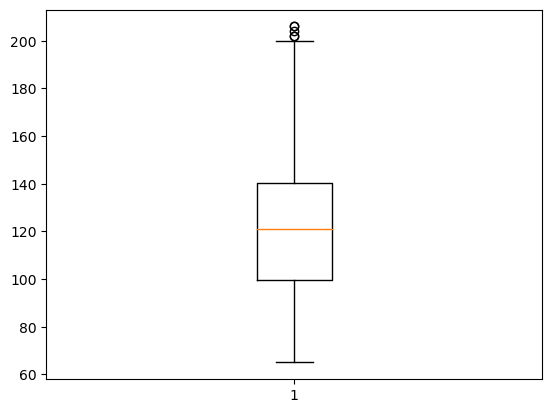

In [8]:
plt.boxplot(df.bpm)

In [9]:
# checking what those few outliers are
df[df['bpm'] > 199]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,streams(x10000),bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
28,Last Night,Morgan Wallen,1,2023,1,31,2420,42982.9812,204,F#,Major,52,52,68,46,0,15,4
100,Lover,Taylor Swift,1,2012,1,1,8448,88283.1184,206,G,Major,43,50,55,50,0,15,10
244,Until I Found You,Stephen Sanchez,1,2021,9,1,4427,72643.4358,202,A#,Major,34,25,51,69,0,18,4
447,It's the Most Wonderful Time of the Year,Andy Williams,1,1963,10,14,8879,66383.2097,202,G,Major,24,76,60,77,0,12,4
506,We Don't Talk About Bruno,"Adassa, Mauro Castillo, Stephanie Beatriz, Enc...",7,2021,11,19,2785,43271.9968,206,NaN,Minor,58,83,45,36,0,11,8
726,O.O,NMIXX,1,2022,2,22,290,13544.4283,200,B,Minor,39,28,77,4,0,6,29


After some fact checking, these are the confirmed bpms for these songs. Thus, we can deem them as reasonable outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa6a0d76170>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa6a0d766b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa6a0d76080>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa6a0d76bf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa6a0d76e90>],
 'means': []}

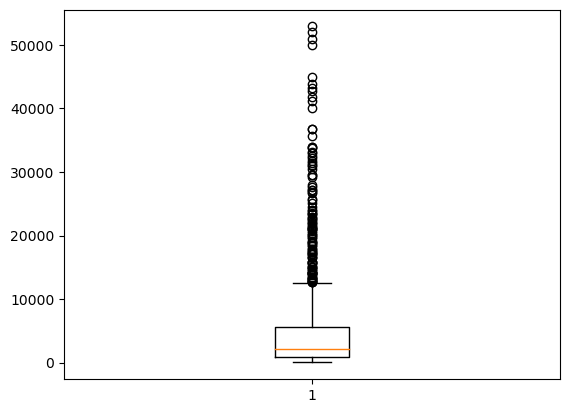

In [10]:
plt.boxplot(df['in_spotify_playlists'])

In [11]:
# checking the topmost outliers
df[df['in_spotify_playlists'] > 50000]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,streams(x10000),bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
630,Mr. Brightside,The Killers,1,2003,9,23,51979,180661.7704,148,C#,Major,35,24,93,0,0,10,8
720,Wake Me Up - Radio Edit,Avicii,1,2013,1,1,50887,197067.3297,124,D,Major,53,66,78,0,0,16,5
757,Get Lucky - Radio Edit,"Pharrell Williams, Nile Rodgers, Daft Punk",3,2013,1,1,52898,93381.5613,116,F#,Minor,79,87,81,4,0,10,4


Having been on Spotify for long enough, I can confirm these three songs make sense to be so high.

We have checked all the necessary columns for outliers and can confirm there are none to deal with anymore. 

### Fifth transformation: transforming in_spotify_playlists from ~5 digit to ~ 3 digit numbers
This will allow the spotify playlists numbers to be more readable, and to be differentiated from the streams numbers.

In [12]:
df['in_spotify_playlists'] = df['in_spotify_playlists'].apply(lambda x : x/100)

### Sixth transformation: renaming in_spotify_playlists

Changing the name to playlists and indicating the value was reduced by 100

In [13]:
df.rename(columns={'in_spotify_playlists' : 'playlists(x100)'}, inplace=True)
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,playlists(x100),streams(x10000),bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,5.53,14138.1703,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,14.74,13371.6286,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,13.97,14000.3974,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,78.58,80084.0817,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,31.33,30323.6322,144,A,Minor,65,23,80,14,63,11,6


### Ethical Implications of the data cleanup

Now the flat file is cleaned up and ready to be analyzed!
To summarize what happened, first we removed all the unnecessary columns. While there may not be any ethical implications to this, it is possible we are missing out on analyzing the different streaming platforms and how certain artists/songs may perform better on them than others. Next, we transformed the streams column, scaling it by 10,000. I chose to do this because those numbers were hard to look at, it was very difficult to compare one song to the one below it. By scaling down the numbers, it makes it more readable. There may be some implications to this if there were songs that had below 10,000 streams, and if so that may be relevant to our analysis which we might miss. However, this dataset is the most streamed songs on Spotify, so that is not likely to be an issue. Then we changed the name of streams to streams(x10000). There may be an ethical implication in that this header is slightly more confusing, but I hope it indicates that the values were reduced by 10,000. Similar ideas can be applied for the scaling down of in_spotify_playlists and renaming it to just playlists. Taking away the Spotify aspect might be misleading, but in combination with taking away all the other streaming platforms, it's believed to be clear that it indicates Spotify playlists. Lastly, while we checked for outliers, all the points that were pointed to as outliers actually had good reason for being outliers, so I chose to let them all stay within the data, as it seemed it would have worse ethical implications to remove them than to keep them. After all, if we're analyzing what makes certain songs more successful, then we need to maintain the ultra-successful songs to be able to possibly gain an understanding. 

# Project Milestone 3
### Perform at least 5 data transformation and/or cleansing steps to the website data.
First, we must read in the tables we want to work with from the [Wikipedia page](https://en.wikipedia.org/wiki/List_of_Billboard_Hot_100_chart_achievements_and_milestones)

In [14]:
url = "https://en.wikipedia.org/wiki/List_of_Billboard_Hot_100_chart_achievements_and_milestones"
# read in the page
tables = pd.read_html(url)

# table of the top ten songs of all time
top_ten = tables[0]
top_ten

,Rank,Single,Year(s) released,Artist(s),Peak and duration
0,1.0,"""Blinding Lights""",2019,The Weeknd,No. 1 for 4 weeks
1,2.0,"""The Twist""","1960, 1961 (re)",Chubby Checker,No. 1 for 3 weeks
2,3.0,"""Smooth""",1999,Santana featuring Rob Thomas,No. 1 for 12 weeks
3,4.0,"""Mack the Knife""",1959,Bobby Darin,No. 1 for 9 weeks
4,5.0,"""Uptown Funk""",2015,Mark Ronson featuring Bruno Mars,No. 1 for 14 weeks
5,6.0,"""How Do I Live""",1997,LeAnn Rimes,No. 2 for 5 weeks
6,7.0,"""Party Rock Anthem""",2011,LMFAO featuring Lauren Bennett & GoonRock,No. 1 for 6 weeks
7,8.0,"""I Gotta Feeling""",2009,The Black Eyed Peas,No. 1 for 14 weeks
8,9.0,"""Macarena (Bayside Boys mix)""",1996,Los Del Rio,No. 1 for 14 weeks
9,10.0,"""Shape of You""",2017,Ed Sheeran,No. 1 for 12 weeks


In [15]:
# table of the songs that were at number one for the longest
week_1 = tables[2]
week_1

,Number of weeks,Artist(s),Song,Year(s)
0,19,"Lil Nas X (1 week solo, 18 weeks featuring Bil...","""Old Town Road""",2019
1,16,Mariah Carey and Boyz II Men,"""One Sweet Day""",1995–96
2,16,Luis Fonsi and Daddy Yankee featuring Justin B...,"""Despacito""",2017
3,16,Morgan Wallen,"""Last Night""",2023
4,15,Harry Styles,"""As It Was""",2022
5,14,Whitney Houston,"""I Will Always Love You""",1992–93
6,14,Boyz II Men,"""I'll Make Love to You""",1994
7,14,Los del Río,"""Macarena"" (Bayside Boys mix)",1996
8,14,Elton John,"""Candle in the Wind 1997"" / ""Something About t...",1997–98
9,14,Mariah Carey,"""We Belong Together""",2005


In [16]:
# table of songs that spent the most weeks in the top ten
weeks_top_ten = tables[7]
weeks_top_ten

,Number of weeks,Artist(s),Song,Year(s),Source
0,57,The Weeknd,"""Blinding Lights""",2020–21,[29][30]
1,44,The Kid Laroi and Justin Bieber,"""Stay""",2021–22,[18][30]
2,41,"Dua Lipa (32 weeks featuring DaBaby, 9 weeks ...","""Levitating""",2021,[31][30]
3,39,Post Malone,"""Circles""",2019–20,[29][30]
4,38,Harry Styles,"""As It Was""",2022–23,[citation needed]
5,37,Glass Animals,"""Heat Waves""",2021–22,[30]
6,37,Morgan Wallen,"""Last Night""",2023,[citation needed]
7,33,Ed Sheeran,"""Shape of You""",2017,[29]
8,33,Maroon 5 featuring Cardi B,"""Girls Like You""",2018–19,[29]
9,33,Post Malone and Swae Lee,"""Sunflower""",2018–19,[29]


## Step 1 - Re-index the top ten table
Seeing as the rank and the indexes line up perfectly, we can just use the rank as the index.

In [17]:
# add 1 to the rank value so it matches up with index
top_ten['Rank'] = top_ten['Rank'].apply(lambda x : x - 1)

# re-index the table so rank is now the index
top_ten = top_ten.reindex(top_ten.Rank)

# drop the rank column
top_ten.drop(columns=['Rank'], inplace=True)
top_ten

,Single,Year(s) released,Artist(s),Peak and duration
Rank,,,,
0.0,"""Blinding Lights""",2019,The Weeknd,No. 1 for 4 weeks
1.0,"""The Twist""","1960, 1961 (re)",Chubby Checker,No. 1 for 3 weeks
2.0,"""Smooth""",1999,Santana featuring Rob Thomas,No. 1 for 12 weeks
3.0,"""Mack the Knife""",1959,Bobby Darin,No. 1 for 9 weeks
4.0,"""Uptown Funk""",2015,Mark Ronson featuring Bruno Mars,No. 1 for 14 weeks
5.0,"""How Do I Live""",1997,LeAnn Rimes,No. 2 for 5 weeks
6.0,"""Party Rock Anthem""",2011,LMFAO featuring Lauren Bennett & GoonRock,No. 1 for 6 weeks
7.0,"""I Gotta Feeling""",2009,The Black Eyed Peas,No. 1 for 14 weeks
8.0,"""Macarena (Bayside Boys mix)""",1996,Los Del Rio,No. 1 for 14 weeks


## Step 2 - Convert Peak and Duration column to a more readable format
First, we can rename this column to just 'Duration (weeks)', and instead of having 'No. 1 for 4 weeks' we can just have an integer number of the amount of weeks the song was number one

In [18]:
# rename column Peak and duration to Duration (weeks)
top_ten.rename(columns={'Peak and duration' : 'Duration (weeks)'}, inplace=True)

# now to change the value 'No. 1 for x weeks' to an integer of x
top_ten['Duration (weeks)'] = top_ten['Duration (weeks)'].apply(lambda x : int(x[10]))
top_ten

,Single,Year(s) released,Artist(s),Duration (weeks)
Rank,,,,
0.0,"""Blinding Lights""",2019,The Weeknd,4
1.0,"""The Twist""","1960, 1961 (re)",Chubby Checker,3
2.0,"""Smooth""",1999,Santana featuring Rob Thomas,1
3.0,"""Mack the Knife""",1959,Bobby Darin,9
4.0,"""Uptown Funk""",2015,Mark Ronson featuring Bruno Mars,1
5.0,"""How Do I Live""",1997,LeAnn Rimes,5
6.0,"""Party Rock Anthem""",2011,LMFAO featuring Lauren Bennett & GoonRock,6
7.0,"""I Gotta Feeling""",2009,The Black Eyed Peas,1
8.0,"""Macarena (Bayside Boys mix)""",1996,Los Del Rio,1


## Step 3 - Changing certain values to be more readable
There are a few values in both tables that have multiple years listed. I will reformat these years to have only the first one listed to make it more uniform and easier in further analysis.

In [19]:
# for year(s) released, i will change "The Twist"'s released year to its original 1960
top_ten.loc[1, 'Year(s) released'] = 1960

# for week1, we will remove anything after the dash under the year. 
# for example, 1995-96 will just be 1995
week_1['Year(s)'] = week_1['Year(s)'].apply(lambda x: x[:4])

# rename the column since we have only one year listed
week_1.rename(columns={"Year(s)" : "Year"}, inplace=True)

week_1

,Number of weeks,Artist(s),Song,Year
0,19,"Lil Nas X (1 week solo, 18 weeks featuring Bil...","""Old Town Road""",2019
1,16,Mariah Carey and Boyz II Men,"""One Sweet Day""",1995
2,16,Luis Fonsi and Daddy Yankee featuring Justin B...,"""Despacito""",2017
3,16,Morgan Wallen,"""Last Night""",2023
4,15,Harry Styles,"""As It Was""",2022
5,14,Whitney Houston,"""I Will Always Love You""",1992
6,14,Boyz II Men,"""I'll Make Love to You""",1994
7,14,Los del Río,"""Macarena"" (Bayside Boys mix)",1996
8,14,Elton John,"""Candle in the Wind 1997"" / ""Something About t...",1997
9,14,Mariah Carey,"""We Belong Together""",2005


## Step 4 - Removing unnecessary columns
In the top ten weeks table, there is the unnecessary source column that can be removed

In [20]:
weeks_top_ten.drop(columns=['Source'], inplace=True)

## Step 5 - Converting Years to be more readable in top ten weeks table
Similarly to the top ten songs table, I will change the Years column so only one year is listed

In [21]:
# keep only the first year listed
weeks_top_ten['Year(s)'] = weeks_top_ten['Year(s)'].apply(lambda x: x[:4])

# rename column from plural Year(s) to singular Year
weeks_top_ten.rename(columns={"Year(s)" : "Year"}, inplace=True)

weeks_top_ten

,Number of weeks,Artist(s),Song,Year
0,57,The Weeknd,"""Blinding Lights""",2020
1,44,The Kid Laroi and Justin Bieber,"""Stay""",2021
2,41,"Dua Lipa (32 weeks featuring DaBaby, 9 weeks ...","""Levitating""",2021
3,39,Post Malone,"""Circles""",2019
4,38,Harry Styles,"""As It Was""",2022
5,37,Glass Animals,"""Heat Waves""",2021
6,37,Morgan Wallen,"""Last Night""",2023
7,33,Ed Sheeran,"""Shape of You""",2017
8,33,Maroon 5 featuring Cardi B,"""Girls Like You""",2018
9,33,Post Malone and Swae Lee,"""Sunflower""",2018


## Post clean up datasets
After cleaning the three tables, here is our final product.

#### Top Ten Songs of All Time 

In [22]:
top_ten

,Single,Year(s) released,Artist(s),Duration (weeks)
Rank,,,,
0.0,"""Blinding Lights""",2019,The Weeknd,4
1.0,"""The Twist""",1960,Chubby Checker,3
2.0,"""Smooth""",1999,Santana featuring Rob Thomas,1
3.0,"""Mack the Knife""",1959,Bobby Darin,9
4.0,"""Uptown Funk""",2015,Mark Ronson featuring Bruno Mars,1
5.0,"""How Do I Live""",1997,LeAnn Rimes,5
6.0,"""Party Rock Anthem""",2011,LMFAO featuring Lauren Bennett & GoonRock,6
7.0,"""I Gotta Feeling""",2009,The Black Eyed Peas,1
8.0,"""Macarena (Bayside Boys mix)""",1996,Los Del Rio,1


#### Most Weeks at Number One

In [23]:
week_1

,Number of weeks,Artist(s),Song,Year
0,19,"Lil Nas X (1 week solo, 18 weeks featuring Bil...","""Old Town Road""",2019
1,16,Mariah Carey and Boyz II Men,"""One Sweet Day""",1995
2,16,Luis Fonsi and Daddy Yankee featuring Justin B...,"""Despacito""",2017
3,16,Morgan Wallen,"""Last Night""",2023
4,15,Harry Styles,"""As It Was""",2022
5,14,Whitney Houston,"""I Will Always Love You""",1992
6,14,Boyz II Men,"""I'll Make Love to You""",1994
7,14,Los del Río,"""Macarena"" (Bayside Boys mix)",1996
8,14,Elton John,"""Candle in the Wind 1997"" / ""Something About t...",1997
9,14,Mariah Carey,"""We Belong Together""",2005


#### Most total weeks in the top ten
In this dataset, we renamed and reformatted the Year column so that only the first year is present.

In [24]:
weeks_top_ten

,Number of weeks,Artist(s),Song,Year
0,57,The Weeknd,"""Blinding Lights""",2020
1,44,The Kid Laroi and Justin Bieber,"""Stay""",2021
2,41,"Dua Lipa (32 weeks featuring DaBaby, 9 weeks ...","""Levitating""",2021
3,39,Post Malone,"""Circles""",2019
4,38,Harry Styles,"""As It Was""",2022
5,37,Glass Animals,"""Heat Waves""",2021
6,37,Morgan Wallen,"""Last Night""",2023
7,33,Ed Sheeran,"""Shape of You""",2017
8,33,Maroon 5 featuring Cardi B,"""Girls Like You""",2018
9,33,Post Malone and Swae Lee,"""Sunflower""",2018


### Ethical Implications of the data cleanup
Now the website data is cleaned up and ready to be analyzed! To summarize what happened, first is the top_ten table that shows the top ten songs of all times. I re-indexed the table so that instead of having the index and Rank be redundant, the Rank is now the index. I also removed the extra year added on for a few of the songs, leaving only the first year the song went into the top ten. Finally, I renamed and cleaned the Duration column, turning into an integer number of weeks instead of the string format of "No. 1 for x weeks". Next, I worked on the week_1 and weeks_top_ten tables. From each of these tables, I renamed and reformatted the Year columns so that only the first year is present, instead of the stretch from one year to the next. I decided to do this because any analysis I will do regarding the year will be from when the song was released. I do not need the duration if it went from one year to the next. Ultimately, this should not have any major ethical implications. While cleaning and transforming the data, it is important to try and change how the data presents without changing the information the data provides. From the transformations and changes I conducted, there is very little ethical implications that should have occurred. 

## Project Milestone 4 - API data pulling & cleanup

In this section, I will pull the data from the Spotify API and perform 5 data transformations on the data to have it ready for modeling.

To obtain the data from the API, I will:

* Send a POST request to the token endpoint URI.
* Add the Content-Type header set to the application/x-www-form-urlencoded value.
* Add a HTTP body containing the Client ID and Client Secret, along with the grant_type parameter set to client_credentials.

In [50]:
import requests

# read client ids that have been stored in a text file
file = open("client.txt", 'r')
clients = file.readlines()
client_id = clients[0]
# removing the \n at the end of the line
client_id = client_id[:len(client_id)-1]
client_secret = clients[1]
file.close()


# URL for the Spotify token endpoint
token_url = "https://accounts.spotify.com/api/token"

# Prepare the data for the POST request
data = {
    "grant_type": "client_credentials",
}

# Set up the headers with Content-Type and authentication
headers = {
    "Content-Type": "application/x-www-form-urlencoded",
}

# Use requests to make the POST request to get the access token
response = requests.post(token_url, data=data, headers=headers, auth=(client_id, client_secret))

# Check for a successful response (status code 200)
if response.status_code == 200:
    # Parse the JSON response to extract the access token
    token_data = response.json()
    access_token = token_data["access_token"]
    print("Connection Successful!")
else:
    print(f"Error: {response.status_code}")
    print(response.text)


Connection Successful!


Based off the tables from the previous tables, I will call data from the API about these artists and create a new table with new information.

## Step 1 - Collecting artists names - removing duplicates
Unfortunately with this API, I cannot gather top artists. 
I will gather the artists from the last three tables to collect more information about them.

In [51]:
# first let's get a list of the artists to get data about
artists_list = []
artists_list.extend(top_ten['Artist(s)'])
artists_list.extend(weeks_top_ten['Artist(s)'])
artists_list.extend(week_1['Artist(s)'])

# remove any duplicates
artists_list = list(set(artists_list))

['Maroon 5',
 'Harry Styles',
 'Whitney Houston',
 'The Weeknd',
 'Elton John',
 'The Black Eyed Peas',
 'Glass Animals',
 'Los del Río',
 'Dua Lipa ',
 'Boyz II Men',
 'Mariah Carey',
 'Los Del Rio',
 'LMFAO',
 'Mark Ronson',
 'Morgan Wallen',
 'Bobby Darin',
 'Santana',
 'Chubby Checker',
 'The Kid Laroi',
 'Ed Sheeran',
 'Mariah Carey',
 'Lil Nas X',
 'Post Malone',
 'LeAnn Rimes',
 'Luis Fonsi',
 'Post Malone']

## Step 2 - Removing unnecessary info
Many of these names have information that is unnecesssary or could cause errors, such as including the featured artists or having multiple artists listed. To avoid errors, I will select only the first name listed.

In [ ]:
# create a new list with artist names cleared of "featuring"
artists_list = [artist.split(" featuring ")[0] if "featuring" in artist else artist for artist in artists_list]

# remove parantheses
artists_list = [artist.split(" (")[0] if "(" in artist else artist for artist in artists_list]

# remove the secondary artist after the 'and'
artists_list = [artist.split(" and ")[0] if "and" in artist else artist for artist in artists_list]
artists_list

Now I will get information about the artists. First I will use this list to get their Spotify ID's, then use that information to get information about each artist individually. Finally, I will combine all of the information into a dataframe. 

In [53]:
# base URL for Spotify's search endpoint
base_url = "https://api.spotify.com/v1/search"

# the different features to store in the dataframe that will be captured here
names = []
followers = []
popularity = []
genre = []

# make API requests for each artist
for artist in artists_list:
    # encode the artist name for use in the URL
    encoded_artist = requests.utils.quote(artist)

    # create the full API endpoint URL for searching the artist
    search_url = f"{base_url}?q={encoded_artist}&type=artist"

    # set up the headers with the access token
    headers = {
        "Authorization": f"Bearer {access_token}"
    }

    # make the GET request to the artist's search endpoint
    response = requests.get(search_url, headers=headers)

    #check for a successful response (status code 200)
    if response.status_code == 200:
        artist_data = response.json()
        # get artist info from json response, assuming the first result is the correct artist
        artist_info = artist_data['artists']["items"][0]
        
        # append the info to the respective lists
        names.append(artist_info.get('name', 'None'))
        genre.append(artist_info.get('genres', 'None'))
        followers.append(artist_info.get('followers', 'None'))
        popularity.append(artist_info.get('popularity', 'None'))
    else:
        print(f"Error for {artist}: {response.status_code}")

# put the data together
data = {
    'Name' : names,
    'Followers': followers,
    'Genre' : genre,
    'Popularity' : popularity
}
        
# create a DataFrame from the list of artist data
api_df = pd.DataFrame(data)

# display the DataFrame
api_df

,Name,Followers,Genre,Popularity
0,Maroon 5,"{'href': None, 'total': 41557036}",[pop],82
1,Harry Styles,"{'href': None, 'total': 29999784}",[pop],83
2,Whitney Houston,"{'href': None, 'total': 9693756}",[pop],73
3,The Weeknd,"{'href': None, 'total': 73952986}","[canadian contemporary r&b, canadian pop, pop]",92
4,Elton John,"{'href': None, 'total': 12430969}","[glam rock, mellow gold, piano rock, rock]",80
5,Black Eyed Peas,"{'href': None, 'total': 7775599}","[dance pop, pop, pop rap]",77
6,Glass Animals,"{'href': None, 'total': 3927484}","[gauze pop, indietronica, modern rock, pov: in...",72
7,Los Del Rio,"{'href': None, 'total': 51077}",[tropical],53
8,Dua Lipa,"{'href': None, 'total': 41953126}","[dance pop, pop, uk pop]",84
9,Boyz II Men,"{'href': None, 'total': 2894845}","[boy band, contemporary r&b, new jack swing, r...",63


## Step 3 - Cleaning the followers variable
For this feature, I only want the number of followers the artist has in the column. Currently, there is a dictionary variable with 'href' being None and 'total' giving us the value of the followers. I will extract this value from the dict to have it alone.

In [60]:
# extract only the total value of followers from Followers column
api_df['Followers'] = api_df['Followers'].apply(lambda x : x['total'])
api_df

,Name,Followers,Genre,Popularity
0,Maroon 5,41557036,[pop],82
1,Harry Styles,29999784,[pop],83
2,Whitney Houston,9693756,[pop],73
3,The Weeknd,73952986,"[canadian contemporary r&b, canadian pop, pop]",92
4,Elton John,12430969,"[glam rock, mellow gold, piano rock, rock]",80
5,Black Eyed Peas,7775599,"[dance pop, pop, pop rap]",77
6,Glass Animals,3927484,"[gauze pop, indietronica, modern rock, pov: in...",72
7,Los Del Rio,51077,[tropical],53
8,Dua Lipa,41953126,"[dance pop, pop, uk pop]",84
9,Boyz II Men,2894845,"[boy band, contemporary r&b, new jack swing, r...",63


## Step 4 - Genre Clean up
I do not want a list as the genre type. However, I could either choose one genre from each category and leave it as that, or manually select the one I think fits best. 
To avoid potential bias, I will choose the first genre. 

In [68]:
# choosing only the first genre of the list given
api_df['Genre'] = api_df['Genre'].apply(lambda x : x[0])
api_df

,Name,Followers,Genre,Popularity
0,Maroon 5,41557036,pop,82
1,Harry Styles,29999784,pop,83
2,Whitney Houston,9693756,pop,73
3,The Weeknd,73952986,canadian contemporary r&b,92
4,Elton John,12430969,glam rock,80
5,Black Eyed Peas,7775599,dance pop,77
6,Glass Animals,3927484,gauze pop,72
7,Los Del Rio,51077,tropical,53
8,Dua Lipa,41953126,dance pop,84
9,Boyz II Men,2894845,boy band,63


## Step 5 - Changing Headers
I will change the header 'Name' to 'Artist' to keep it uniform with the other datasets. 

In [69]:
api_df.rename(columns={'Name': 'Artist'}, inplace=True)
api_df

,Artist,Followers,Genre,Popularity
0,Maroon 5,41557036,pop,82
1,Harry Styles,29999784,pop,83
2,Whitney Houston,9693756,pop,73
3,The Weeknd,73952986,canadian contemporary r&b,92
4,Elton John,12430969,glam rock,80
5,Black Eyed Peas,7775599,dance pop,77
6,Glass Animals,3927484,gauze pop,72
7,Los Del Rio,51077,tropical,53
8,Dua Lipa,41953126,dance pop,84
9,Boyz II Men,2894845,boy band,63


The API data is now ready!

### Ethical Implications post data cleanup

There are some stronger ethical implications during this data cleanup. Specifically, because there were multiple artists listed for quite a few songs, and I chose to drop the secondary artists, there is potential to have lost some data that would have impacted the results. For example, for the song 'Stay', the artist listed was The Kid Laroi and Justin Bieber, and using the algorithm of keeping only the first artist, Justin Bieber was dropped. However, arguably Justin Bieber is a very subsantial artists whose data may contribute significantly to this study, but the algorithm dropped his name. Thus, this, and situations similar to this one, may have some ethical implications on the data. There may be a similar effect to how I minimized the genres, choosing only the first one listed. However, I don't believe this will have as strong as an impact as dropping potentially important artists.